In [203]:
# import the necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

In [204]:
from os import listdir
from os.path import isfile, join
images_paths = sorted([f for f in listdir('images') if isfile(join('images', f))])

In [277]:
def bound_box(image_path):
    # load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    """print(image.shape)
    plt.imshow(gray, 'gray')"""

    # compute the Scharr gradient magnitude representation of the images
    # in both the x and y direction using OpenCV 2.4
    ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
    gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)
    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)

    #image_derivative = np.maximum(image_horizontal_derivative, image_vertical_derivative)

    """plt.figure()
    plt.imshow(image_horizontal_derivative, 'gray')"""
    
    ret2,thresh = cv2.threshold(gradient,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    #kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (20, 20))
    #closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 100))
    opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 20))
    closed1 = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 1))
    opened1 = cv2.morphologyEx(closed1, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 1))
    dilated = cv2.dilate(opened1, kernel, iterations=3)
    
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(cnts)
    cnts = imutils.grab_contours(cnts)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    #print(rect)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    #print(box)
    # draw a bounding box arounded the detected barcode and display the
    # image
    image_bb = image.copy()
    cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
    plt.figure()
    plt.imshow(image_bb, 'gray')
    
    coordinates_source = box.astype('float32')
    min_width = coordinates_source[:,0].min()
    min_height = coordinates_source[:,1].min()
    max_width = coordinates_source[:,0].max()
    max_height = coordinates_source[:,1].max()
    def normalize(value, axis=0):
        if axis==0:  # Horizontal dimension
            return min_width if (value-min_width<max_width-value) \
                             else max_width
        elif axis==1:  # Vertical dimension
            return min_height if (value-min_height<max_height-value) \
                              else max_height
    coordinates_source = np.array(sorted([tuple(v) for v in coordinates_source], key=lambda t: (normalize(t[1], axis=1),
                                                                                                normalize(t[0], axis=0))))
    print(coordinates_source)
    def dist(point1, point2):
        return np.sqrt(np.sum((point1-point2)**2))
    destination_height = int(max([dist(coordinates_source[0],coordinates_source[2]),
                             dist(coordinates_source[1],coordinates_source[3])]))
    destination_width = int(max([dist(coordinates_source[0],coordinates_source[1]),
                             dist(coordinates_source[2],coordinates_source[3])]))
    coordinates_destination = np.array([[0, 0],
                                        [destination_width-1, 0],
                                        [0, destination_height-1],
                                        [destination_width-1, destination_height-1]], dtype='float32')
    # Computing the trasformation, i.e. homography. Warping.
    H = cv2.getPerspectiveTransform(coordinates_source, coordinates_destination)
    # Applying the trasformation
    gray1 = cv2.warpPerspective(gray, H, (destination_width, destination_height))
    plt.figure()
    plt.imshow(gray1, 'gray')

[[ 400.  256.]
 [1290.  252.]
 [ 405. 1135.]
 [1295. 1130.]]
Wall time: 262 ms


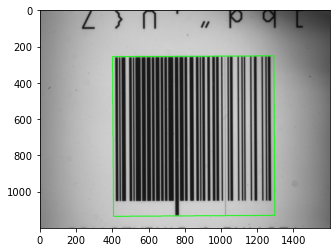

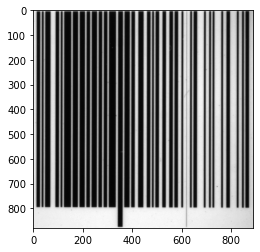

In [206]:
%%time
bound_box(f'images/{images_paths[0]}')

[[ 349.  282.]
 [1242.  282.]
 [ 349. 1089.]
 [1242. 1089.]]
Wall time: 254 ms


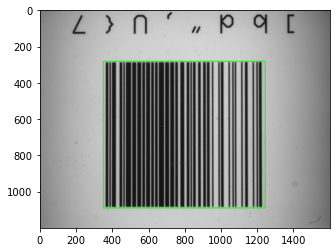

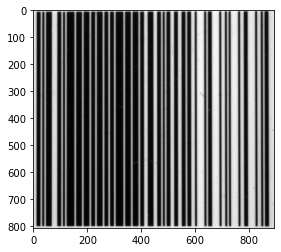

In [207]:
%%time
bound_box(f'images/{images_paths[1]}')

[[ 199.  239.]
 [1038.  232.]
 [ 203.  770.]
 [1042.  764.]]
Wall time: 205 ms


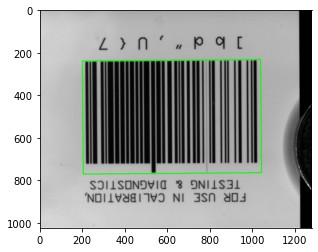

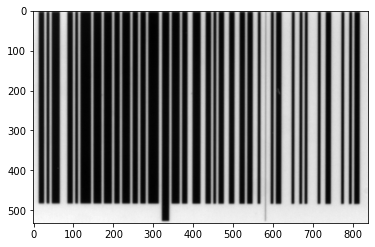

In [208]:
%%time
bound_box(f'images/{images_paths[2]}')

[[130. 254.]
 [968. 254.]
 [130. 745.]
 [968. 745.]]
Wall time: 174 ms


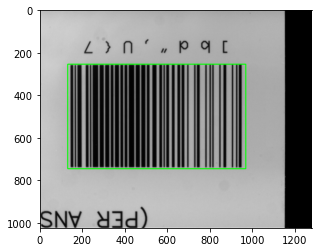

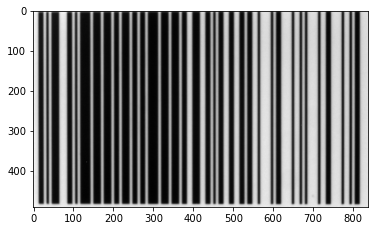

In [209]:
%%time
bound_box(f'images/{images_paths[3]}')

[[335. 167.]
 [899. 167.]
 [335. 734.]
 [899. 734.]]
Wall time: 218 ms


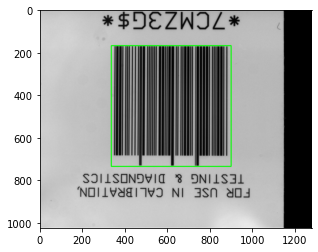

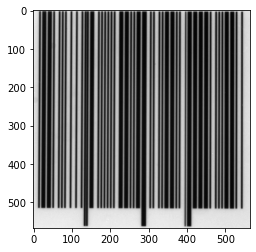

In [210]:
%%time
bound_box(f'images/{images_paths[4]}')

[[343. 246.]
 [910. 246.]
 [343. 769.]
 [910. 769.]]


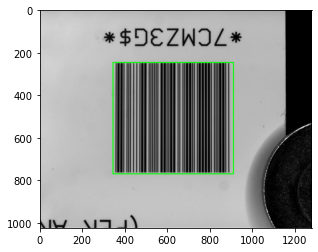

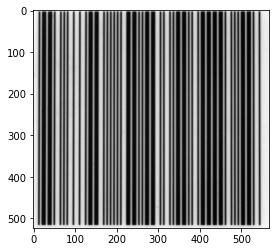

In [211]:
bound_box(f'images/{images_paths[5]}')

[[ 164.  283.]
 [1098.  281.]
 [ 165.  852.]
 [1099.  850.]]


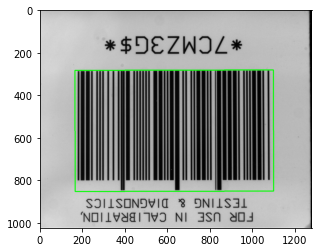

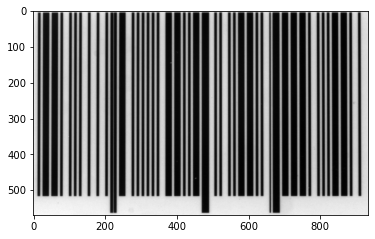

In [212]:
bound_box(f'images/{images_paths[6]}')

[[ 152.  270.]
 [1090.  272.]
 [ 151.  793.]
 [1089.  794.]]


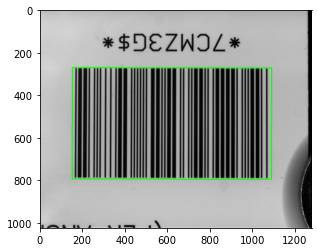

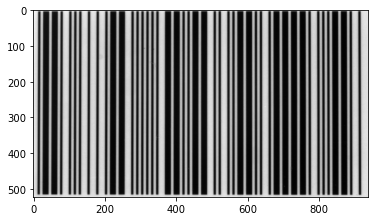

In [213]:
bound_box(f'images/{images_paths[7]}')

[[ 152.  270.]
 [1090.  272.]
 [ 151.  793.]
 [1089.  794.]]


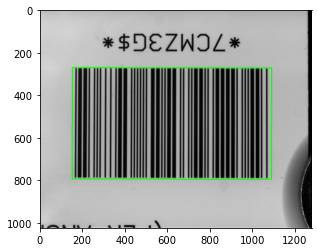

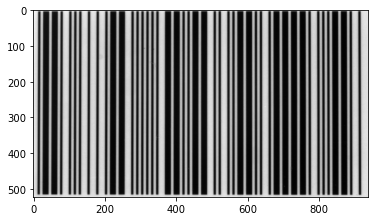

In [214]:
bound_box(f'images/{images_paths[7]}')

[[331. 333.]
 [971. 337.]
 [328. 783.]
 [968. 787.]]


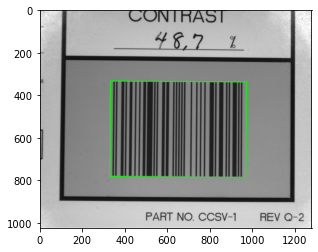

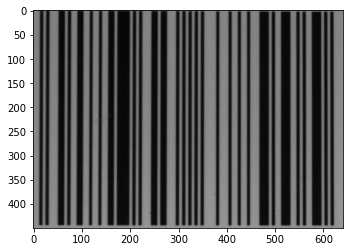

In [215]:
bound_box(f'images/{images_paths[8]}')

[[343. 252.]
 [978. 260.]
 [337. 724.]
 [972. 732.]]


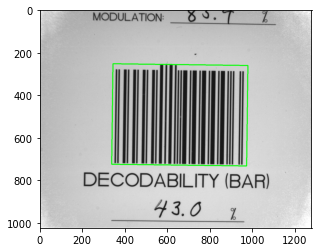

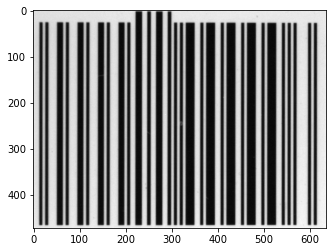

In [216]:
bound_box(f'images/{images_paths[9]}')

In [217]:
print(f'images/{images_paths[10]}')

images/EAN-UPC-DEFECTS IMGB.BMP


In [218]:
#bound_box(f'images/{images_paths[10]}')

[[260. 281.]
 [953. 278.]
 [261. 761.]
 [954. 759.]]


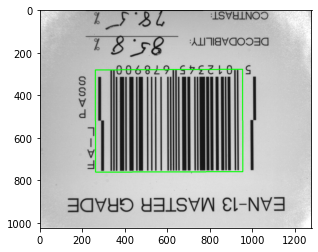

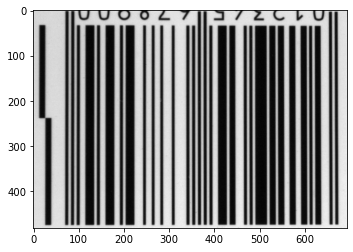

In [219]:
bound_box(f'images/{images_paths[11]}')

In [220]:
#bound_box(f'images/{images_paths[12]}')

[[  99.  116.]
 [1293.  118.]
 [  98.  314.]
 [1292.  316.]]


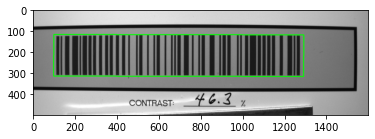

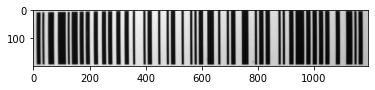

In [221]:
bound_box(f'images/{images_paths[13]}')

[[ 162.  141.]
 [1350.  141.]
 [ 162.  341.]
 [1350.  341.]]


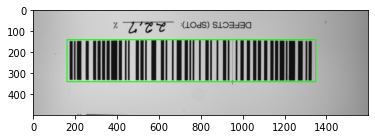

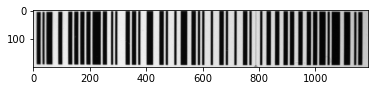

In [223]:
bound_box(f'images/{images_paths[14]}')

[[ 175.  165.]
 [1382.  150.]
 [ 178.  366.]
 [1385.  352.]]


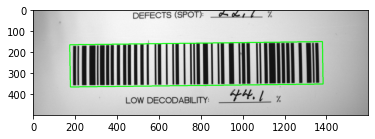

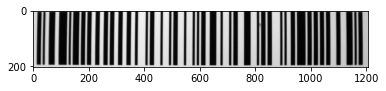

In [225]:
bound_box(f'images/{images_paths[15]}')

[[ 153.  137.]
 [1448.  138.]
 [ 153.  336.]
 [1448.  336.]]


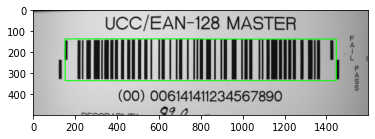

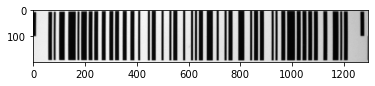

In [227]:
bound_box(f'images/{images_paths[16]}')

[[ 196.  143.]
 [1350.  121.]
 [ 201.  389.]
 [1354.  367.]]


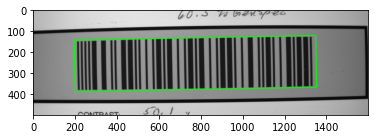

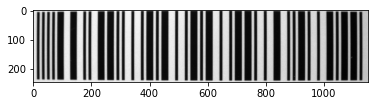

In [228]:
bound_box(f'images/{images_paths[17]}')

[[ 198.  126.]
 [1356.  116.]
 [ 200.  373.]
 [1358.  363.]]


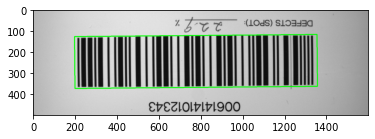

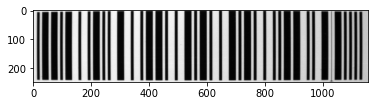

In [230]:
bound_box(f'images/{images_paths[18]}')

[[ 199.  119.]
 [1356.  119.]
 [ 199.  380.]
 [1356.  380.]]


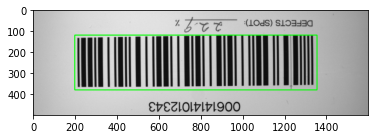

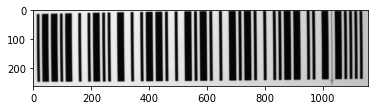

In [274]:
bound_box(f'images/{images_paths[18]}')

[[ 197.  126.]
 [1355.  116.]
 [ 199.  373.]
 [1357.  363.]]


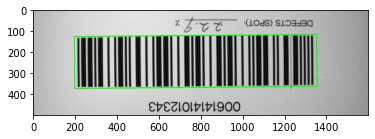

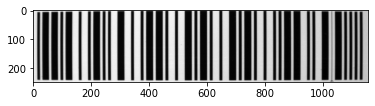

In [278]:
bound_box(f'images/{images_paths[18]}')

[[ 231.   55.]
 [1385.   57.]
 [ 230.  301.]
 [1384.  303.]]


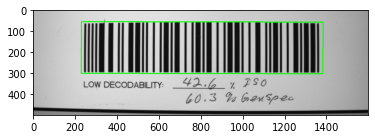

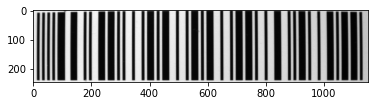

In [232]:
bound_box(f'images/{images_paths[19]}')

[[ 248.  140.]
 [1406.  126.]
 [ 251.  387.]
 [1409.  373.]]


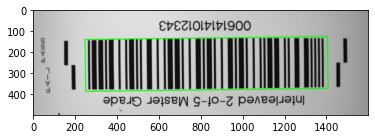

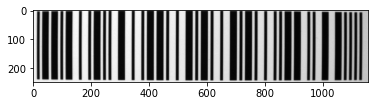

In [234]:
bound_box(f'images/{images_paths[20]}')

In [235]:
print(f'images/{images_paths[21]}')

images/TestChart.xls


In [236]:
#bound_box(f'images/{images_paths[21]}')

[[178. 210.]
 [887. 205.]
 [182. 647.]
 [890. 641.]]


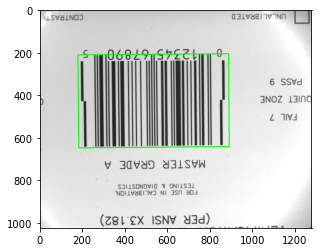

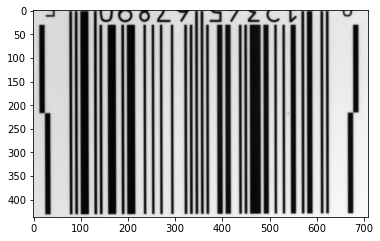

In [237]:
bound_box(f'images/{images_paths[22]}')

[[178. 210.]
 [887. 205.]
 [182. 647.]
 [890. 641.]]


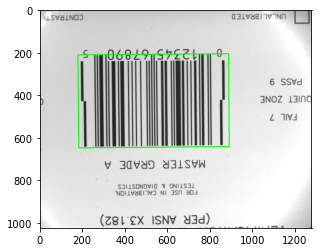

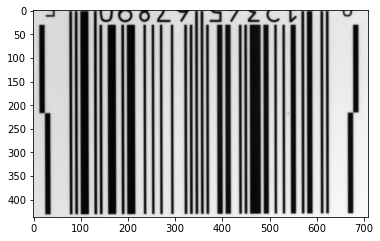

In [238]:
bound_box(f'images/{images_paths[22]}')

[[314. 304.]
 [896. 310.]
 [310. 740.]
 [891. 746.]]


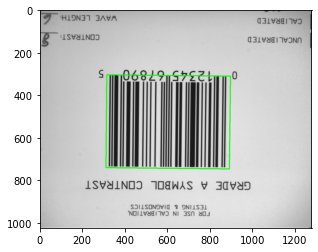

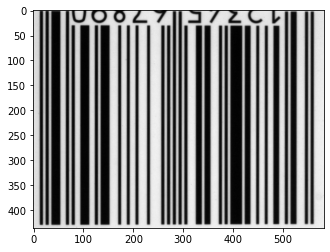

In [239]:
bound_box(f'images/{images_paths[23]}')

[[348. 299.]
 [927. 310.]
 [340. 735.]
 [919. 745.]]


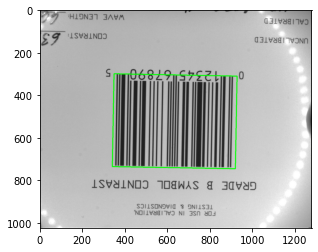

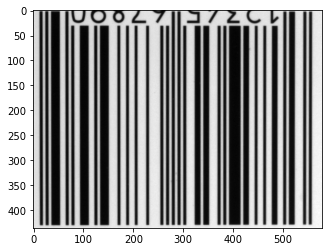

In [240]:
bound_box(f'images/{images_paths[24]}')

[[356. 303.]
 [934. 306.]
 [354. 737.]
 [933. 739.]]


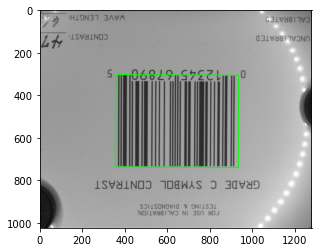

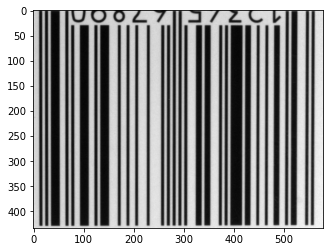

In [241]:
bound_box(f'images/{images_paths[25]}')

[[291. 314.]
 [870. 326.]
 [282. 718.]
 [862. 730.]]


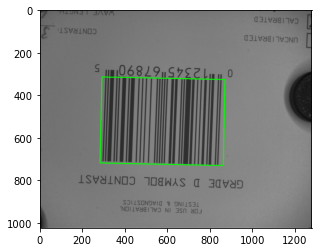

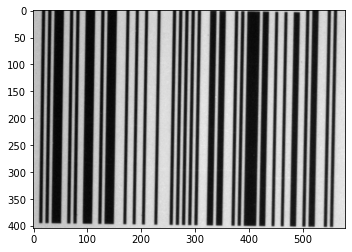

In [242]:
bound_box(f'images/{images_paths[26]}')

[[295. 283.]
 [872. 304.]
 [279. 713.]
 [856. 734.]]


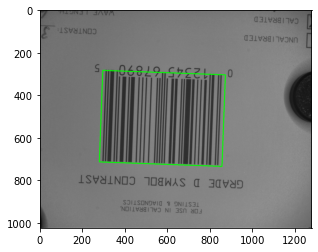

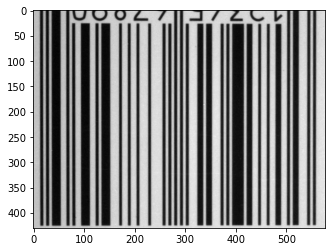

In [273]:
bound_box(f'images/{images_paths[26]}')

[[295. 287.]
 [872. 308.]
 [279. 713.]
 [856. 734.]]


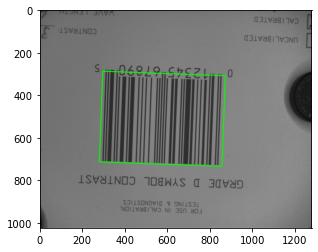

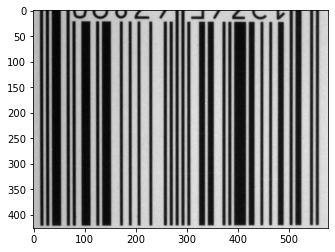

In [279]:
bound_box(f'images/{images_paths[26]}')

[[333. 291.]
 [909. 300.]
 [325. 723.]
 [902. 733.]]


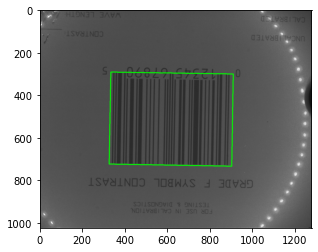

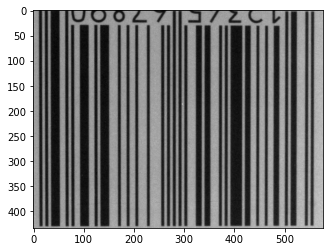

In [243]:
bound_box(f'images/{images_paths[27]}')

[[326. 293.]
 [907. 301.]
 [320. 731.]
 [901. 738.]]


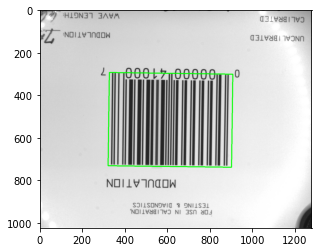

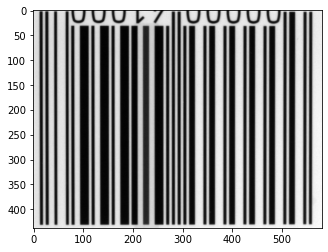

In [244]:
bound_box(f'images/{images_paths[28]}')

[[325. 299.]
 [907. 309.]
 [318. 735.]
 [899. 745.]]


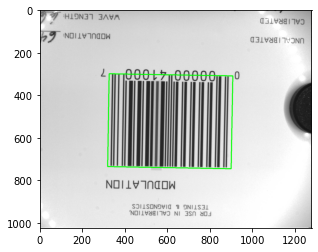

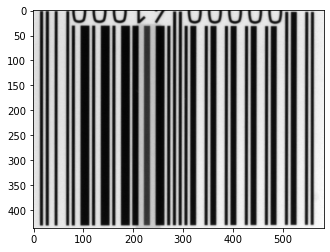

In [245]:
bound_box(f'images/{images_paths[29]}')

[[323. 309.]
 [904. 321.]
 [314. 746.]
 [895. 757.]]


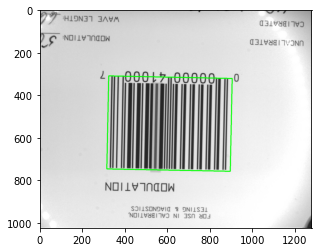

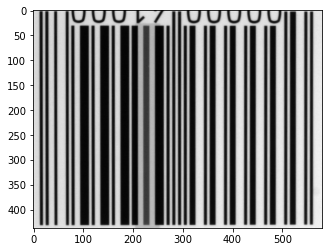

In [246]:
bound_box(f'images/{images_paths[30]}')

[[331. 298.]
 [910. 315.]
 [318. 734.]
 [898. 751.]]


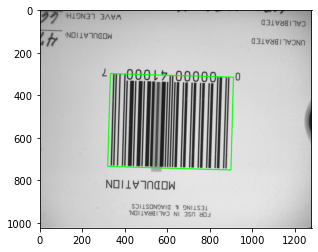

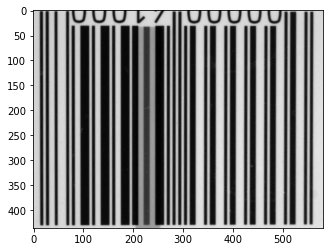

In [247]:
bound_box(f'images/{images_paths[31]}')

[[332. 289.]
 [912. 289.]
 [332. 725.]
 [912. 725.]]


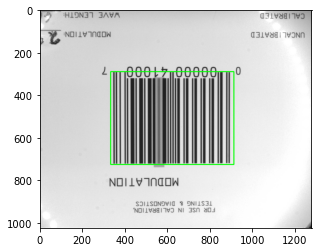

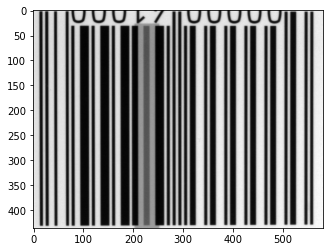

In [248]:
bound_box(f'images/{images_paths[32]}')

[[344. 297.]
 [924. 302.]
 [340. 753.]
 [920. 759.]]


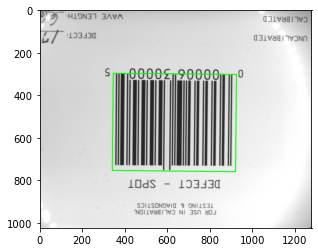

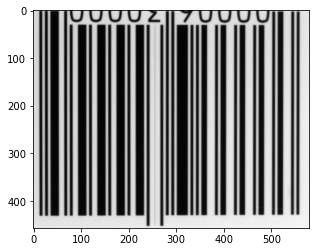

In [249]:
bound_box(f'images/{images_paths[34]}')

[[343. 287.]
 [924. 295.]
 [337. 743.]
 [917. 752.]]


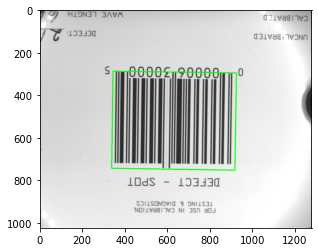

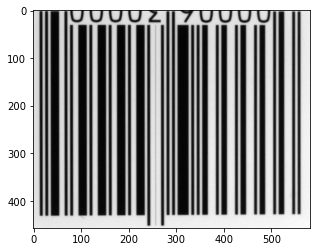

In [250]:
bound_box(f'images/{images_paths[35]}')

[[331. 292.]
 [911. 292.]
 [331. 748.]
 [911. 748.]]


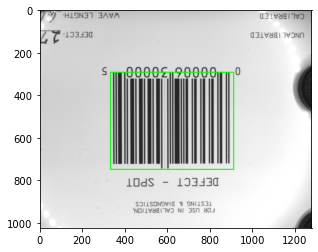

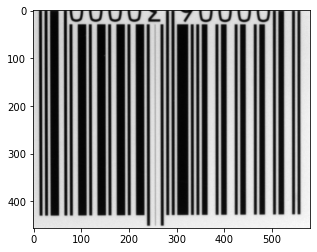

In [251]:
bound_box(f'images/{images_paths[36]}')

[[318. 297.]
 [897. 298.]
 [318. 754.]
 [897. 754.]]


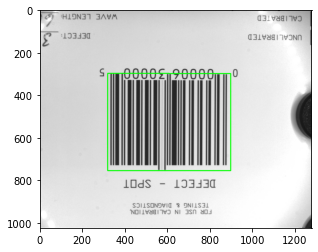

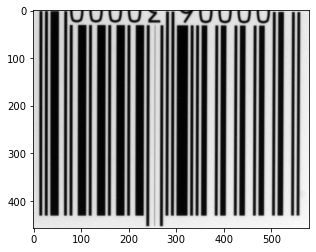

In [252]:
bound_box(f'images/{images_paths[37]}')

[[330. 298.]
 [911. 300.]
 [329. 755.]
 [910. 756.]]


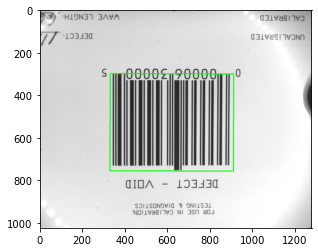

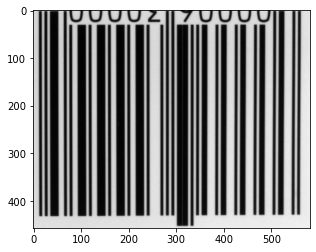

In [253]:
bound_box(f'images/{images_paths[38]}')

[[334. 291.]
 [915. 297.]
 [329. 747.]
 [909. 754.]]


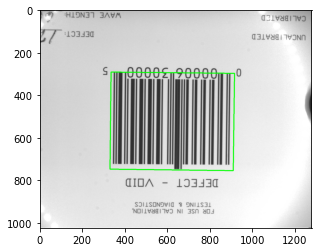

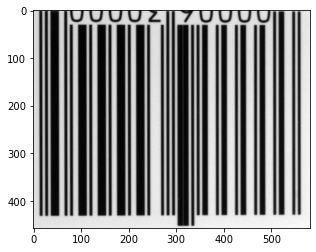

In [254]:
bound_box(f'images/{images_paths[39]}')

[[298. 300.]
 [879. 303.]
 [296. 758.]
 [876. 761.]]


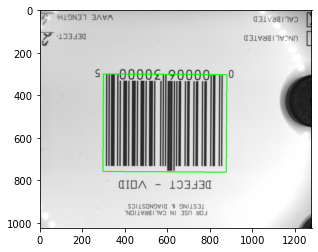

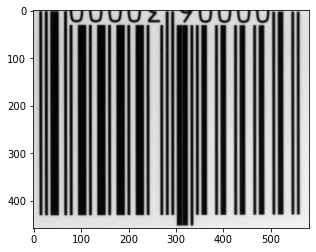

In [255]:
bound_box(f'images/{images_paths[40]}')

[[288. 294.]
 [868. 291.]
 [290. 750.]
 [870. 747.]]


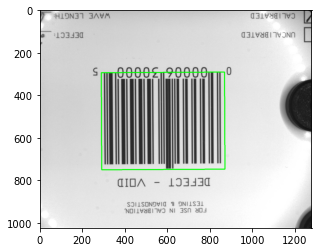

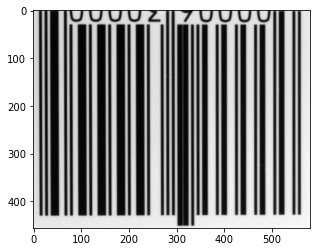

In [256]:
bound_box(f'images/{images_paths[41]}')

[[286. 291.]
 [866. 291.]
 [286. 748.]
 [866. 748.]]


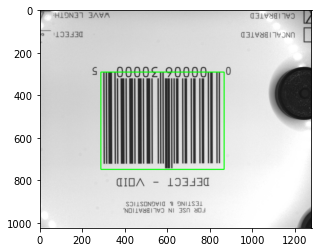

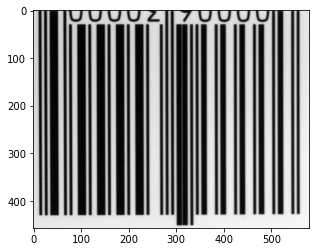

In [257]:
bound_box(f'images/{images_paths[42]}')

[[280. 285.]
 [861. 285.]
 [280. 721.]
 [861. 721.]]


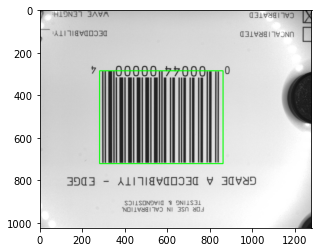

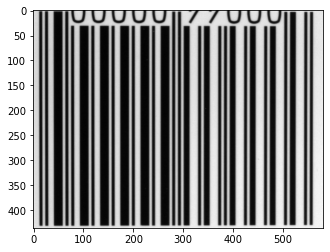

In [258]:
bound_box(f'images/{images_paths[43]}')

[[280. 285.]
 [861. 285.]
 [280. 721.]
 [861. 721.]]


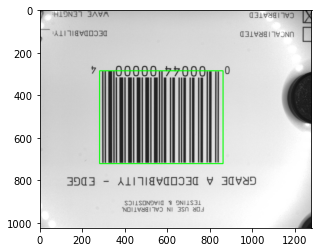

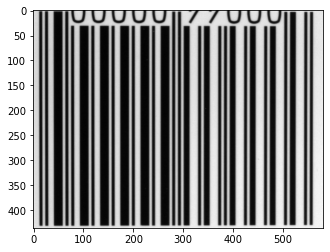

In [259]:
bound_box(f'images/{images_paths[43]}')

[[290. 291.]
 [871. 295.]
 [287. 729.]
 [868. 733.]]


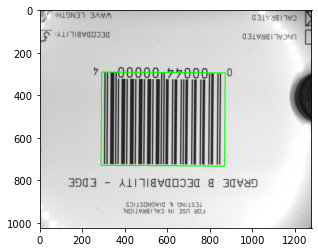

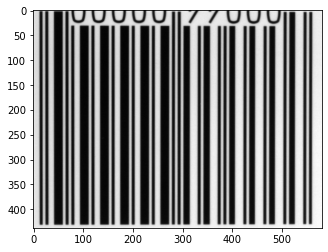

In [260]:
bound_box(f'images/{images_paths[44]}')

[[279. 303.]
 [860. 306.]
 [276. 740.]
 [858. 743.]]


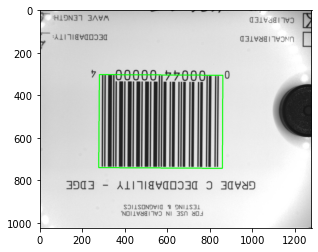

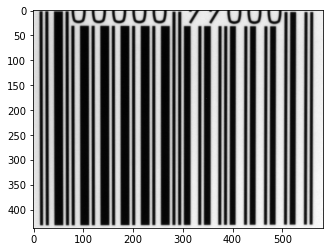

In [261]:
bound_box(f'images/{images_paths[45]}')

[[263. 292.]
 [844. 301.]
 [257. 729.]
 [838. 737.]]


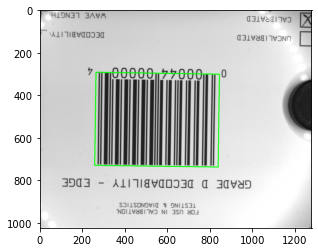

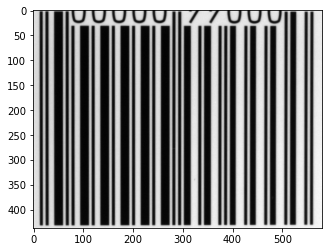

In [262]:
bound_box(f'images/{images_paths[46]}')

[[257. 301.]
 [839. 306.]
 [253. 737.]
 [835. 742.]]


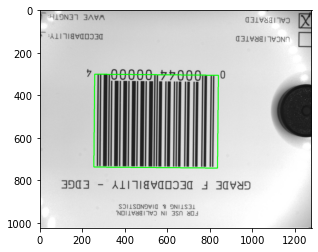

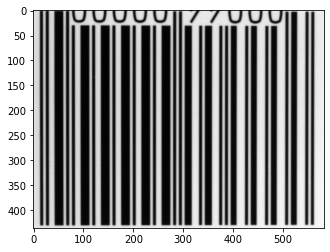

In [263]:
bound_box(f'images/{images_paths[47]}')

[[251. 299.]
 [833. 308.]
 [245. 736.]
 [827. 744.]]


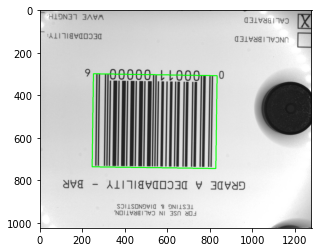

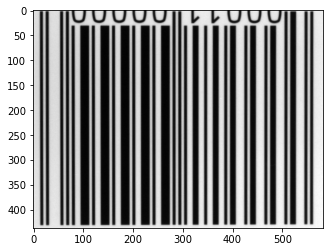

In [264]:
bound_box(f'images/{images_paths[48]}')

[[255. 299.]
 [837. 306.]
 [250. 737.]
 [832. 744.]]


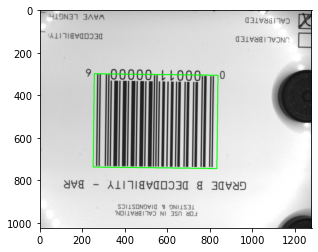

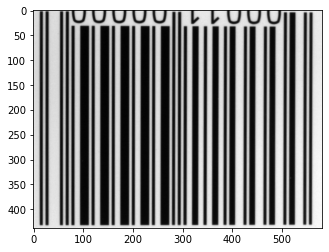

In [265]:
bound_box(f'images/{images_paths[49]}')

[[280. 277.]
 [862. 286.]
 [273. 714.]
 [855. 722.]]


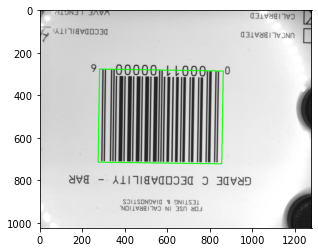

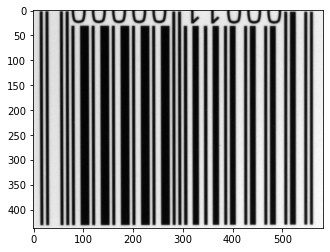

In [266]:
bound_box(f'images/{images_paths[50]}')

[[282. 287.]
 [864. 295.]
 [276. 725.]
 [858. 733.]]


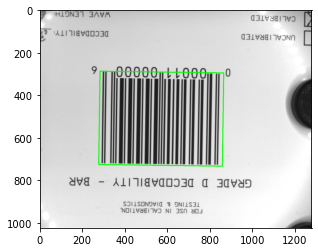

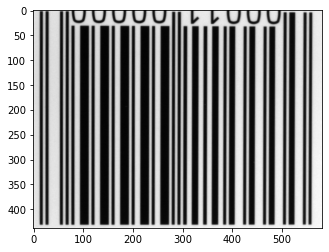

In [267]:
bound_box(f'images/{images_paths[51]}')

[[295. 291.]
 [876. 291.]
 [295. 727.]
 [876. 727.]]


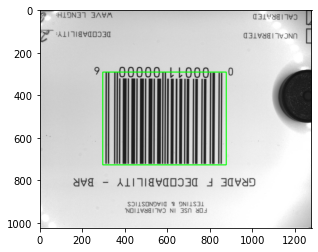

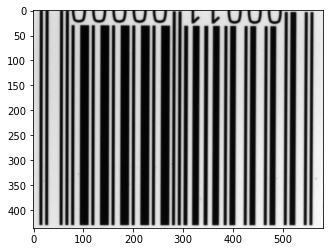

In [268]:
bound_box(f'images/{images_paths[52]}')

[[ 97.  42.]
 [259.  42.]
 [ 97. 143.]
 [259. 143.]]
Wall time: 96 ms


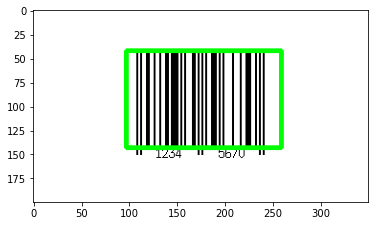

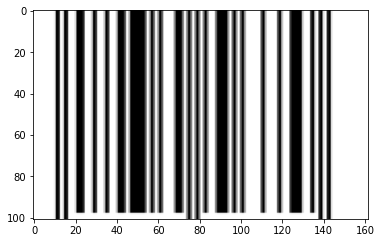

In [269]:
%%time
bound_box('other images/1.png')